Data Compilation, Preliminary Analysis, and Non-Deep Learning Methods

By: Mason Barnes, Emily Huo, Anupama Jayaraman

In [ ]:
#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import re

#Data Compilation
**Don't run this if already have final datasheet: poisoning_full_data.csv

8 datasets --> 1 final set

##Process Individual Datasets
Load in the relevant datasets:


1. arcos-va-statewide-itemized.csv
2. fips-codes-virginia.csv
3. NCHS_-_Drug_Poisoning_Mortality_by_County__United_States 
4. pa_reimb_county_2014.xls
5. Population_of_Virginia_localities__total__by_race__and_Hispanic_Latino_ethnicity___2010-2018
6. School_Enrollment_Virginia_Census_2016.csv
7. Virginia_Labor_Force_and_Unemployment_estimates_by_Month_by_County.csv
8. Virginia_School_Enrollment_Census_2015.csv



###VA Counties & Codes
Processing: fips-codes-virginia.csv

In [ ]:
codes = pd.read_csv('fips-codes-virginia.csv')
codes = codes.drop('State Abbreviation', axis = 1)
codes = codes.drop('State FIPS Code', axis = 1)
codes = codes.drop('FIPS Entity Code', axis = 1)
codes = codes.drop('ANSI Code', axis = 1)
codes.drop(codes.tail(208).index,inplace=True)
codes = codes.rename(columns={'County FIPS Code': 'Code', 'GU Name': 'Name'})
for row in codes.index:
    codes['Name'][row] = codes['Name'][row] + " " + codes['Entity Description'][row]
codes = codes.drop('Entity Description', axis = 1)
display(codes)
codes_dictionary = dict(zip(codes.Code, codes.Name))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Code,Name
0,510,Alexandria city
1,515,Bedford city
2,520,Bristol city
3,530,Buena Vista city
4,540,Charlottesville city
...,...,...
129,191,Washington County
130,193,Westmoreland County
131,195,Wise County
132,197,Wythe County


###Labor Force
Processing: Virginia_Labor_Force_and_Unemployment_estimates_by_Month_by_County.csv

In [ ]:
labor_force = pd.read_csv('Virginia_Labor_Force_and_Unemployment_estimates_by_Month_by_County.csv')
labor_force = labor_force.drop('SurveyCode', axis=1)
labor_force = labor_force.drop('SeasonalCode', axis=1)
labor_force = labor_force.drop('AreaCode', axis=1)
labor_force = labor_force.drop('StateCode', axis=1)
labor_force = labor_force.drop('Period', axis=1)
labor_force.head(10)


,CountyCode,Year,LaborForce,Employment,Unemployment,UnemploymentRate
0,147,2022,"11,033","10,715",318,2.9
1,21,2020,"2,830","2,755",75,2.7
2,840,2022,"14,736","14,334",402,2.7
3,73,2022,"18,890","18,455",435,2.3
4,810,2022,"224,895","219,441","5,454",2.4
5,155,2022,"16,589","16,161",428,2.6
6,678,2022,"2,233","2,167",66,3.0
7,71,2022,"7,768","7,524",244,3.1
8,147,2022,"11,171","10,734",437,3.9
9,21,2022,"2,827","2,749",78,2.8


In [ ]:
labor_force['Name'] = ''
for row in labor_force.index:
    labor_force['Name'][row] = codes_dictionary[labor_force['CountyCode'][row]]
labor_force = labor_force.drop('CountyCode', axis = 1)
labor_force = labor_force[labor_force['Year'] >= 2010]
labor_force = labor_force[labor_force['Year'] <= 2016]
labor_force.head(10)

KeyError: ignored

###Demographics
Processing: Population_of_Virginia_localities__total__by_race__and_Hispanic_Latino_ethnicity___2010-2018.csv

In [ ]:
def parseCounty(s):
  return s[:s.index(',')]

demographics = pd.read_csv('Population_of_Virginia_localities__total__by_race__and_Hispanic_Latino_ethnicity___2010-2018.csv')
demographics = demographics.drop('B01003_001E', axis=1)
demographics = demographics.drop('state', axis=1)
demographics = demographics.rename(columns={
    'county': 'Name',
    'year': 'Year',
    'B03003_003E': 'Total Hispanic/Latino',
    'B02008_001E': 'Total White',
    'B02009_001E': 'Total Black or African American',
    'B02010_001E': 'Total American Indian or Alaskan Native',
    'B02011_001E': 'Total Asian',
    'B02012_001E': 'Total Hawaiian / Pacific Islander',
    'B02013_001E': 'Total other race',
})
demographics['Name'] = demographics['Name'].apply(parseCounty)
demographics = demographics[demographics['Year'] <= 2016]

print(demographics.head(10))

    Year                   Name Total Hispanic/Latino Total White  \
0   2014        Accomack County                 2,909      23,207   
1   2014       Albemarle County                 5,698      86,090   
6   2016  Prince William County                97,117     287,930   
8   2016         Pulaski County                   525      32,293   
10  2016    Rappahannock County                   257       7,024   
12  2016        Richmond County                   561       6,226   
14  2016         Roanoke County                 2,517      84,760   
16  2016      Rockbridge County                   351      21,505   
18  2016      Rockingham County                 4,864      74,754   
20  2016         Russell County                   318      27,462   

   Total Black or African American Total American Indian or Alaskan Native  \
0                            9,792                                     319   
1                           11,082                                     644   
6     

###School Enrollment 2015 & 2016
Processing: Virginia_School_Enrollment_Census_2015.csv & School_Enrollment_Virginia_Census_2016.csv

In [ ]:
enrollment_2015 = pd.read_csv('Virginia_School_Enrollment_Census_2015.csv')
enrollment_2016 = pd.read_csv('School_Enrollment_Virginia_Census_2016.csv')

enrollment_2015 = enrollment_2015[enrollment_2015['SummaryLevel'] == 50]
enrollment_2015 = enrollment_2015.filter(['AreaName', 'B14001_003', 'B14001_004', 'B14001_005'], axis=1)
enrollment_2015 = enrollment_2015.rename(columns={
    'AreaName' : 'Name',
    'B14001_003' : 'Preschool/Nursery School Enrollment',
    'B14001_004' : 'Kindegarten Enrollment',
    'B14001_005' : '1st-4th grade enrollment',
})
enrollment_2015['Name'] = enrollment_2015['Name'].apply(parseCounty)

enrollment_2016 = enrollment_2016[enrollment_2016['SummaryLevel'] == 50]
enrollment_2016 = enrollment_2016.filter(['AreaName', 'B14001_003', 'B14001_004', 'B14001_005'], axis=1)
enrollment_2016 = enrollment_2016.rename(columns={
    'AreaName' : 'Name', 
    'B14001_003' : 'Preschool/Nursery School Enrollment',
    'B14001_004' : 'Kindegarten Enrollment',
    'B14001_005' : '1st-4th grade enrollment',
})
enrollment_2016['Name'] = enrollment_2016['Name'].apply(parseCounty)

print(enrollment_2015.head(10))

                 Name  Preschool/Nursery School Enrollment  \
12    Accomack County                                  142   
13   Albemarle County                                  260   
14   Alleghany County                                   53   
15      Amelia County                                  165   
16     Amherst County                                  127   
17  Appomattox County                                   97   
18   Arlington County                                  363   
19     Augusta County                                  163   
20        Bath County                                   40   
21     Bedford County                                  206   

    Kindegarten Enrollment  1st-4th grade enrollment  
12                     133                       196  
13                     243                       393  
14                      89                       145  
15                     103                       149  
16                     114                

###Poisoning Mortality
Processing: NCHS_-_Drug_Poisoning_Mortality_by_County__United_States.csv

In [ ]:
poisoning = pd.read_csv('NCHS_-_Drug_Poisoning_Mortality_by_County__United_States.csv')

poisoning = poisoning[poisoning['State'] == 'Virginia']
poisoning = poisoning.rename(columns={
    'County': 'Name',
})
poisoning['Name'] = poisoning['Name'].apply(parseCounty)
poisoning = poisoning.drop('FIPS', axis=1)
poisoning = poisoning.drop('FIPS State', axis=1)
poisoning = poisoning[poisoning['Year'] >= 2010]


###Drug Use
Processing: arcos-va-statewide-itemized.csv

**Avoid running this section if can just read in drugUseVA.csv (already processed data)


In [ ]:
#File too big to load in - must read through drive
#For loading in files directly from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive as outputDrive
import gspread

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

outputDrive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Read data from Drive (Anupama path - must change if someone else's drive is set up differently)
drugAbuse_raw = pd.read_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/DrugAbuse/arcos-va-statewide-itemized.csv")

#Relevant columns: Transaction Date & Buyer County

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,5,22,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
drugAbuse_raw.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Reporter_family', 'dos_str', 'MME', 'year'],
      dtype='object')

In [ ]:
drug_date = drugAbuse_raw['TRANSACTION_DATE']
drug_year = []
for d in drug_date:
  drug_year.append(int(str(d)[-4:]))
yrs = np.unique(drug_year)

drugAbuse_raw['year'] = drug_year
drug_sub = drugAbuse_raw[['year','BUYER_COUNTY']]

drug_yrCnty = dict()
for y in yrs:
  yr_curr = drug_sub.loc[drug_sub['year']==int(y)]
  drug_yrCnty[y] = np.unique(yr_curr['BUYER_COUNTY'], return_counts=True)

yearDrug_data = []
countyDrug_data = []
numDrug_data = []

for y in yrs:
  arr = drug_yrCnty[y]
  for i in range(0, len(arr[0])):
    yearDrug_data.append(int(y))
    countyDrug_data.append(arr[0][i])
    numDrug_data.append(arr[1][i])

In [ ]:
#County names do not include "County"
county_proper_drug = []

for c in countyDrug_data:
  cnty = c.title()
  if cnty[-4:] != 'City' or 'Charles' in cnty: #there is a Charles City County
    cnty = cnty+" County"
  
  county_proper_drug.append(cnty)

In [ ]:
#view all counties in list
np.unique(county_proper_drug)

array(['Accomack County', 'Albemarle County', 'Alexandria City',
       'Alleghany County', 'Amelia County', 'Amherst County',
       'Appomattox County', 'Arlington County', 'Augusta County',
       'Bath County', 'Bedford County', 'Bland County',
       'Botetourt County', 'Bristol County', 'Brunswick County',
       'Buchanan County', 'Buckingham County', 'Buena Vista City',
       'Campbell County', 'Caroline County', 'Carroll County',
       'Charlotte County', 'Charlottesville City', 'Chesapeake City',
       'Chesterfield County', 'Clarke County', 'Colonial Heights City',
       'Covington City', 'Craig County', 'Culpeper County',
       'Cumberland County', 'Danville City', 'Dickenson County',
       'Dinwiddie County', 'Essex County', 'Fairfax City',
       'Fairfax County', 'Falls Church City', 'Fauquier County',
       'Floyd County', 'Fluvanna County', 'Franklin City',
       'Franklin County', 'Frederick County', 'Fredericksburg City',
       'Galax City', 'Giles County', 

In [ ]:
drugData_combo = [yearDrug_data, county_proper_drug, numDrug_data]

drugAbuse = pd.DataFrame (drugData_combo).transpose()
drugAbuse.columns = columns = ['Year', 'Name', 'NumDrugBuys']
print (drugAbuse)
drugAbuse.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/drugUseVA.csv",index=False)

      Year                 Name NumDrugBuys
0     2006      Accomack County        1410
1     2006     Albemarle County        5017
2     2006      Alexandria City        4171
3     2006     Alleghany County         948
4     2006        Amelia County         543
...    ...                  ...         ...
1127  2014  Westmoreland County         688
1128  2014      Winchester City        4461
1129  2014          Wise County        7746
1130  2014         Wythe County        4548
1131  2014          York County        3712

[1132 rows x 3 columns]


###Medicare
Processing: pa_reimb_county_2014.xls

**Also being read via GDrive - if have access to medicareVA_2014.csv (processed data), use that instead of running this section

In [ ]:
#Read in data

med = pd.read_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/Medicare Enrollments/pa_reimb_county_2014.csv")
cnty_name = []
enroll = []

for i in range(0,len(med)):
  pnt = med.iloc[i]
  n = str(pnt['County name'])
  if n[0:2] == 'VA':
    cnty_name.append((n[3:]))
    enroll.append(pnt['Medicare enrollees (2014)'])

med_combo = [cnty_name, enroll]

medicare = pd.DataFrame (med_combo).transpose()
medicare.columns = ['Name', 'Enrollment']
print (medicare)

medicare.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/medicareVA_2014.csv",index=False)

                    Name Enrollment
0        Accomack County     5,448 
1       Albemarle County    14,593 
2       Alleghany County     1,206 
3          Amelia County     1,492 
4         Amherst County     4,429 
..                   ...        ...
129         Suffolk city     7,776 
130  Virginia Beach city    40,520 
131      Waynesboro city     4,759 
132    Williamsburg city     7,577 
133      Winchester city     6,588 

[134 rows x 2 columns]


###Save Processed Data Files to Drive

In [ ]:
#Drug Use already saved as drugUseVA.csv above
#Medicare already saved as medicareVA_2014.csv above
poisoning.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/drugPoisonMortality.csv",index=False)
enrollment_2016.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/comboEnrollment15_16.csv",index=False)
demographics.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/demographicsVA.csv",index=False)
labor_force.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/laborForceVA.csv",index=False)
codes.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/countyCodes.csv",index=False)

##Combining Datasets

Save final, combined dataset as: **poisoning_full_data.csv**

Skip the above steps if already have access to the following processed data files (upload them in temporary file storage):

1. drugUseVA.csv
2. medicareVA_2014.csv
3. demographicsVA.csv
4. laborForceVA.csv
5. countyCodes.csv
6. drugPoisonMortality.csv
7. comboEnrollment15_16.csv



In [ ]:
#Read in all processed 
poisoning = pd.read_csv('drugPoisonMortality.csv')
drug_use = pd.read_csv('drugUseVA.csv')
medicare = pd.read_csv('medicareVA_2014.csv')
demographics = pd.read_csv('demographicsVA.csv')
labor_force = pd.read_csv('laborForceVA.csv')
codes = pd.read_csv('countyCodes.csv')
enrollment = pd.read_csv('comboEnrollment15_16.csv')

In [ ]:
#poisoning.sort_values('Names', inplace=True)
drug_use.sort_values('Name', inplace=True)
medicare.sort_values('Name', inplace=True)
demographics.sort_values('Name', inplace=True)
labor_force.sort_values('Name', inplace=True)
enrollment.sort_values('Name', inplace=True)

In [ ]:
poisoning['LaborForce'] = ''
poisoning['Employment'] = ''
poisoning['Unemployment'] = ''
poisoning['UnemploymentRate'] = ''
poisoning['Total Hispanic/Latino'] = ''
poisoning['Total White'] = ''
poisoning['Total Black or African American'] = ''
poisoning['Total American Indian or Alaskan Native'] = ''
poisoning['Total Asian'] = ''
poisoning['Total Hawaiian / Pacific Islander'] = ''
poisoning['Total other race'] = ''
poisoning['Preschool/Nursery School Enrollment'] = ''
poisoning['Kindegarten Enrollment'] = ''
poisoning['1st-4th grade enrollment'] = ''
poisoning['NumDrugBuys'] = ''
poisoning['Medicare Enrollment'] = ''

poisoning = poisoning.reset_index()

p=0
for row_p in poisoning.index:
  for row_l in labor_force.index:
    if labor_force['Year'][row_l] == poisoning['Year'][row_p] and labor_force['Name'][row_l] == poisoning['Name'][row_p]:
      poisoning.loc[p, 'LaborForce'] = int(re.sub(",","",labor_force['LaborForce'][row_l]))
      poisoning.loc[p, 'Employment'] = int(re.sub(",","",labor_force['Employment'][row_l]))
      poisoning.loc[p,'Unemployment'] = int(re.sub(",","",labor_force['Unemployment'][row_l]))
      poisoning.loc[p, 'UnemploymentRate'] = labor_force['UnemploymentRate'][row_l]
  for row_d in demographics.index:
    if demographics['Year'][row_d] == poisoning['Year'][row_p] and demographics['Name'][row_d] == poisoning['Name'][row_p]: 
      poisoning.loc[p, 'Total Hispanic/Latino'] = int(re.sub(",","",demographics['Total Hispanic/Latino'][row_d]))
      poisoning.loc[p, 'Total White'] = int(re.sub(",","",demographics['Total White'][row_d]))
      poisoning.loc[p, 'Total Black or African American'] = int(re.sub(",","",demographics['Total Black or African American'][row_d]))
      poisoning.loc[p, 'Total American Indian or Alaskan Native'] = int(re.sub(",","",demographics['Total American Indian or Alaskan Native'][row_d]))
      poisoning.loc[p, 'Total Asian'] = int(re.sub(",","",demographics['Total Asian'][row_d]))
      poisoning.loc[p, 'Total Hawaiian / Pacific Islander'] = int(re.sub(",","",demographics['Total Hawaiian / Pacific Islander'][row_d]))
      poisoning.loc[p, 'Total other race'] = int(re.sub(",","",demographics['Total other race'][row_d]))
  for row_e in enrollment.index:
    if poisoning['Name'][row_p].lower() == enrollment['Name'][row_e].lower():
      poisoning.loc[p, 'Preschool/Nursery School Enrollment'] = enrollment['Preschool/Nursery School Enrollment'][row_e]
      poisoning.loc[p, 'Kindegarten Enrollment'] = enrollment['Kindegarten Enrollment'][row_e]
      poisoning.loc[p, '1st-4th grade enrollment'] = enrollment['1st-4th grade enrollment'][row_e]
  for row_du in drug_use.index:
    if drug_use['Year'][row_du] == poisoning['Year'][row_p] and drug_use['Name'][row_du].lower() == poisoning['Name'][row_p].lower():
      poisoning.loc[p, 'NumDrugBuys'] = drug_use['NumDrugBuys'][row_du]
  for row_m in medicare.index:
    if poisoning['Name'][row_p].lower() == medicare['Name'][row_m].lower():
      poisoning.loc[p, 'Medicare Enrollment'] = int(re.sub(",","",medicare['Enrollment'][row_m]))
  p = p+1

In [ ]:
#poisoning.to_csv('poisoning_full_data.csv')
poisoning.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/poisoning_full_data.csv",index=False)

###Addition of County Region Feature

In [ ]:
#Read in all processed 
poisoning = pd.read_csv('poisoning_full_data.csv')
region = pd.read_csv('VACountyRegions.csv')

In [ ]:
poisoning.sort_values('Name', inplace=True)
region.sort_values('Name', inplace=True)

In [ ]:
region

,Name,Region
74,Accomack County,Eastern
0,Albemarle County,Central
99,Alexandria city,Northern
124,Alleghany County,Valley
1,Amelia County,Central
...,...,...
67,Williamsburg city,Hampton Roads
123,Winchester city,Valley
97,Wise County,Southwest
98,Wythe County,Southwest


In [ ]:
poisoning['Region'] = ''

for row_p in poisoning.index:
  cnty = poisoning['Name'][row_p]
  reg = region.loc[region["Name"]==cnty]["Region"].values[0]
  poisoning.loc[row_p,'Region'] = reg
  

Streaming output truncated to the last 5000 lines.
NumDrugBuys                                                             9556.0
Medicare Enrollment                                                      12791
Region                                                            West Central
Name: 713, dtype: object
 
Roanoke County
West Central
index                                                                      321
Year                                                                      2015
State                                                                 Virginia
Name                                                            Roanoke County
Population                                                               94409
Estimated Age-adjusted Death Rate, 16 Categories (in ranges)           14-15.9
LaborForce                                                               49703
Employment                                                               47628
Unemployment             

In [ ]:
poisoning.to_csv("/content/gdrive/MyDrive/Machine Learning Project/Data_CSV_files/poisoning_full_data.csv",index=False)

#Preliminary Analysis

In [1]:
#Import statements (again to make sure they are run before running the code below)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import re

In [2]:
#Read in data and drop useless features (index has no meaning, the state is VA for all)
poisoning = pd.read_csv('poisoning_full_data.csv')
poisoning = poisoning.drop('index', axis=1)
poisoning = poisoning.drop('State', axis=1)

##Describe & Visualize Data

In [3]:
#view datatable
poisoning.head()

,Year,Name,Population,"Estimated Age-adjusted Death Rate, 16 Categories (in ranges)",LaborForce,Employment,Unemployment,UnemploymentRate,Total Hispanic/Latino,Total White,...,Total American Indian or Alaskan Native,Total Asian,Total Hawaiian / Pacific Islander,Total other race,Preschool/Nursery School Enrollment,Kindegarten Enrollment,1st-4th grade enrollment,NumDrugBuys,Medicare Enrollment,Region
0,2013,Accomack County,33005,12-13.9,16018,14615,1403,8.8,2924,23131,...,293,36,0,512,329,298,1534,2647.0,5448,Eastern
1,2014,Accomack County,32998,12-13.9,15840,14488,1352,8.5,2909,23207,...,319,46,0,321,329,298,1534,2513.0,5448,Eastern
2,2015,Accomack County,32973,12-13.9,15557,14575,982,6.3,2909,22991,...,329,50,0,457,329,298,1534,NaN,5448,Eastern
3,2016,Accomack County,32947,14-15.9,15067,14158,909,6.0,2910,22806,...,319,72,0,504,329,298,1534,NaN,5448,Eastern
4,2012,Accomack County,33314,10-11.9,16610,15408,1202,7.2,2902,23188,...,296,49,0,497,329,298,1534,2510.0,5448,Eastern


In [4]:
#Get basic information
poisoning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 21 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Year                                                          931 non-null    int64  
 1   Name                                                          931 non-null    object 
 2   Population                                                    931 non-null    int64  
 3   Estimated Age-adjusted Death Rate, 16 Categories (in ranges)  931 non-null    object 
 4   LaborForce                                                    931 non-null    int64  
 5   Employment                                                    931 non-null    int64  
 6   Unemployment                                                  931 non-null    int64  
 7   UnemploymentRate                                              931 non-n

In [5]:
#get the basic descriptive statistcs
poisoning.describe()

,Year,Population,LaborForce,Employment,Unemployment,UnemploymentRate,Total Hispanic/Latino,Total White,Total Black or African American,Total American Indian or Alaskan Native,Total Asian,Total Hawaiian / Pacific Islander,Total other race,Preschool/Nursery School Enrollment,Kindegarten Enrollment,1st-4th grade enrollment,NumDrugBuys,Medicare Enrollment
count,931.000000,9.310000e+02,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,608.000000,931.00000
mean,2013.000000,6.199862e+04,31723.379162,29919.350161,1804.029001,6.671429,4932.572503,43666.933405,12612.690655,580.790548,4096.760473,115.295381,1652.827068,958.609023,800.932331,3133.112782,5305.047697,5935.24812
std,2.001075,1.219179e+05,66235.798402,63187.077609,3186.916596,2.254501,17432.275905,79475.273912,24157.810057,1304.438548,20251.063387,321.753726,6141.990837,2317.245343,1765.994039,6759.905466,6739.744813,9011.84316
min,2010.000000,2.214000e+03,1308.000000,1268.000000,40.000000,2.500000,0.000000,1826.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,47.000000,2.000000,36.00000
25%,2011.000000,1.440650e+04,6691.000000,6238.000000,416.000000,5.100000,274.500000,10588.000000,1408.000000,82.000000,72.000000,0.000000,69.500000,153.000000,141.000000,620.000000,1396.500000,2011.00000
50%,2013.000000,2.553200e+04,12635.000000,11729.000000,796.000000,6.300000,715.000000,20994.000000,3914.000000,180.000000,265.000000,14.000000,215.000000,301.000000,297.000000,1162.000000,3160.500000,3353.00000
75%,2015.000000,5.481600e+04,26801.500000,25249.000000,1708.000000,8.000000,2623.500000,44496.000000,9168.000000,445.000000,1165.500000,69.500000,783.500000,722.000000,584.000000,2671.000000,6175.750000,6653.00000
max,2016.000000,1.142234e+06,629070.000000,599920.000000,34763.000000,19.900000,181940.000000,756639.000000,122209.000000,12643.000000,237478.000000,2894.000000,62362.000000,21872.000000,15792.000000,60740.000000,47953.000000,83868.00000


In [6]:
num_list = list(poisoning.describe().columns) #get numerical features
cat_list = list(set(poisoning.columns) - set(poisoning.describe().columns)) #get categorical features

In [7]:
#Look at the number of null values for each of the features 
num_null = poisoning.isnull().sum()
with pd.option_context('display.max_rows', None): print(num_null)
#only NumDrugBuys has null values (this data only covers up to 2014 and is not present for a few of the counties in Virginia)

Year                                                              0
Name                                                              0
Population                                                        0
Estimated Age-adjusted Death Rate, 16 Categories (in ranges)      0
LaborForce                                                        0
Employment                                                        0
Unemployment                                                      0
UnemploymentRate                                                  0
Total Hispanic/Latino                                             0
Total White                                                       0
Total Black or African American                                   0
Total American Indian or Alaskan Native                           0
Total Asian                                                       0
Total Hawaiian / Pacific Islander                                 0
Total other race                                

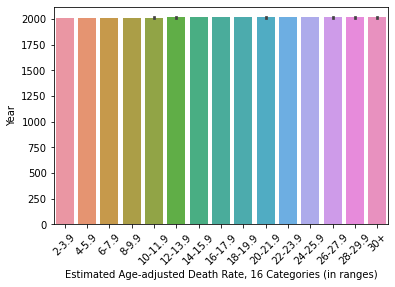

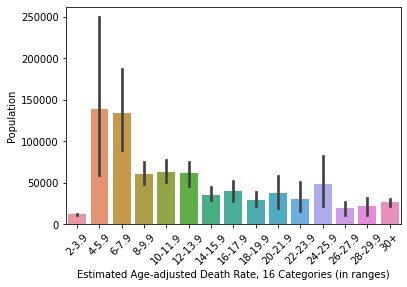

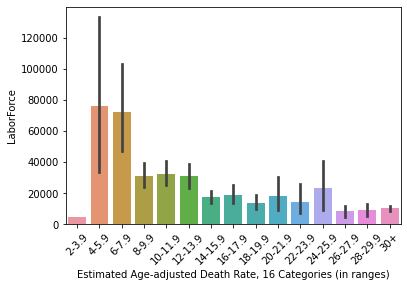

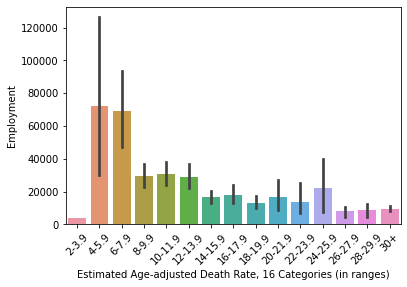

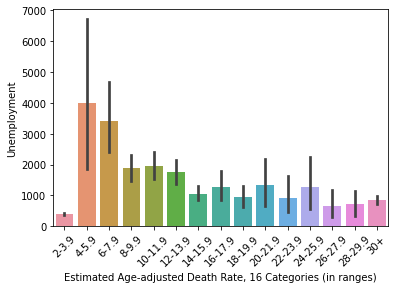

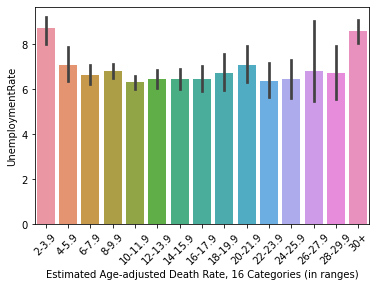

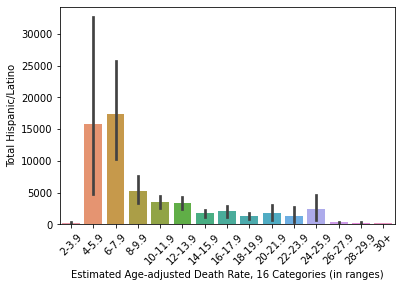

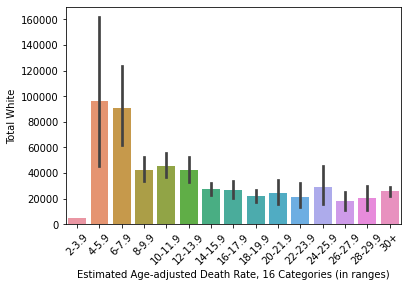

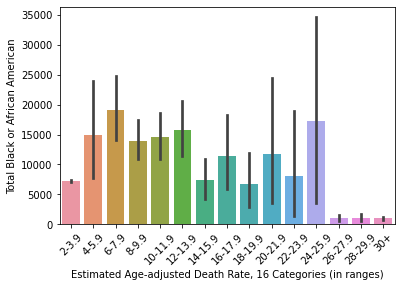

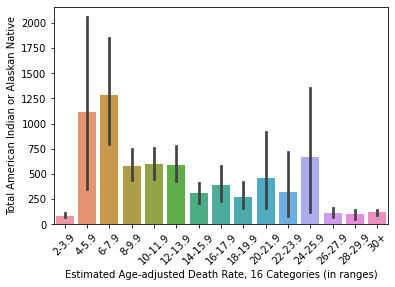

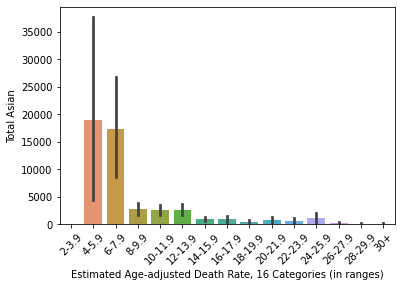

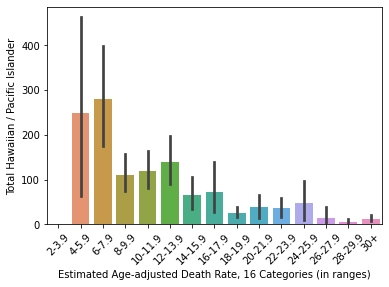

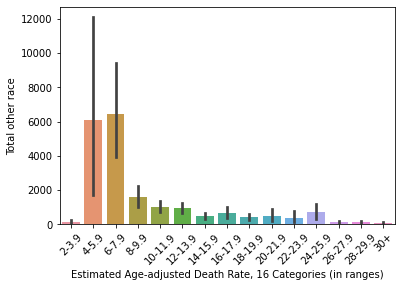

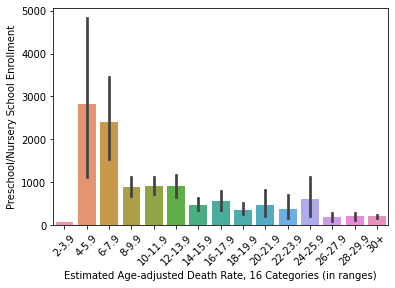

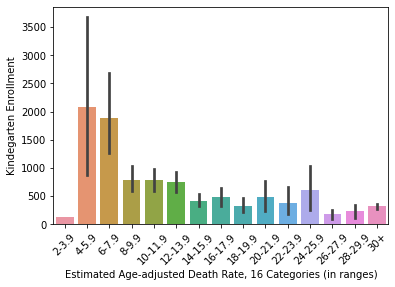

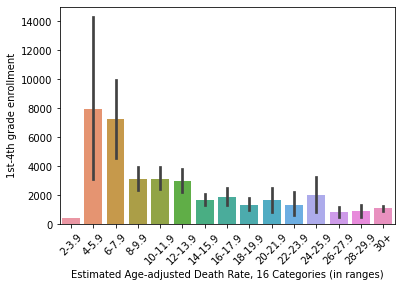

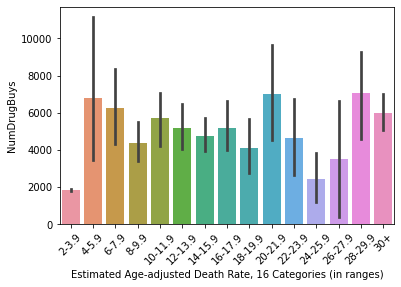

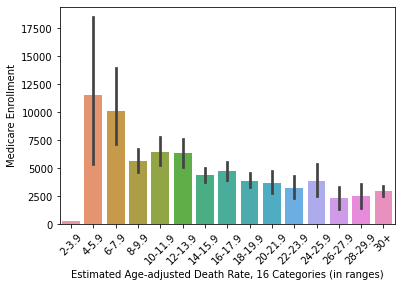

In [8]:
#Visualize poisoning death categories against each numerical variable (everything but county/region)
#there is no apparent correlation
death_order = ['2-3.9', '4-5.9', '6-7.9','8-9.9','10-11.9', '12-13.9', '14-15.9', '16-17.9', '18-19.9', '20-21.9', '22-23.9', '24-25.9', '26-27.9', '28-29.9', '30+']
import seaborn as sns
count = 0
for q in num_list:
  plt.figure(count)
  sns.barplot(data=poisoning, x="Estimated Age-adjusted Death Rate, 16 Categories (in ranges)", y=q, order=death_order)
  plt.xticks(rotation=45)
  count = count+1

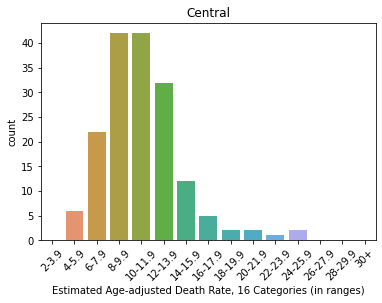

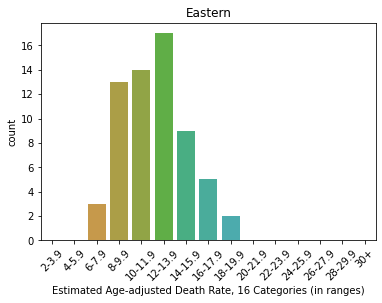

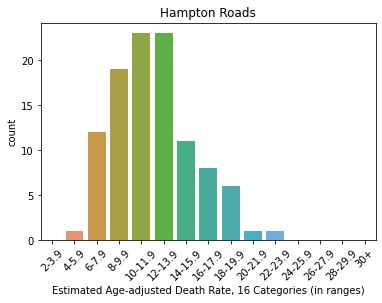

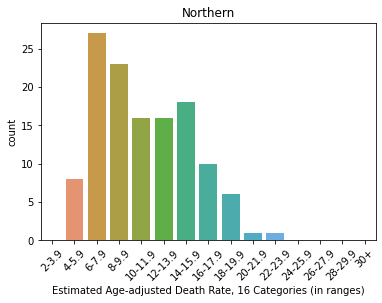

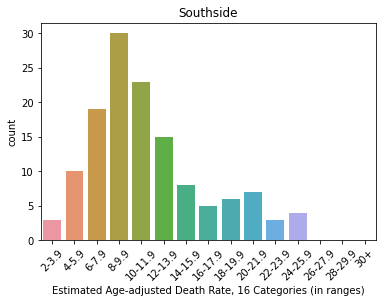

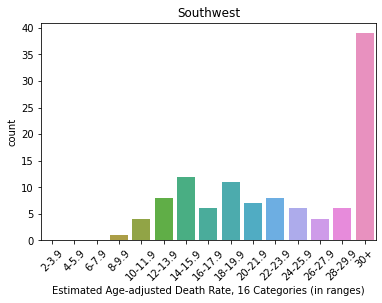

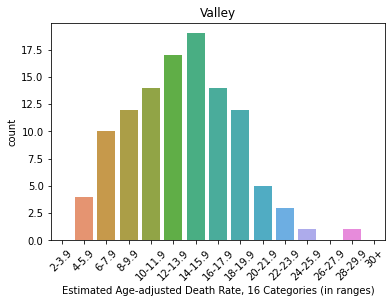

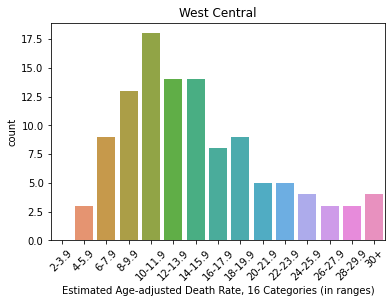

In [9]:
#Visualize Estimated Death by VA region
count = 0
reg_list = np.unique(poisoning['Region'].values)
for r in reg_list:
  poison_sub = poisoning.loc[poisoning['Region']==r]
  plt.figure(count)
  sns.countplot(data=poison_sub, x='Estimated Age-adjusted Death Rate, 16 Categories (in ranges)', order=death_order)
  plt.xticks(rotation=45)
  plt.title(r)
  count = count+1

##Preliminary Experiment: Random Forest

Data Cleaning

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

X = poisoning.drop('Estimated Age-adjusted Death Rate, 16 Categories (in ranges)', axis=1)
X = X.drop('Name', axis=1)
y = poisoning['Estimated Age-adjusted Death Rate, 16 Categories (in ranges)'].copy()

#cat_list = ['Year']
#num_list = [x for x in X.columns if x !='Year']

num_list = list(X.describe().columns) #get numerical features
cat_list = list(set(X.columns) - set(poisoning.describe().columns)) #get categorical features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()), #put all numerical data on same scale
    ])

num_attribs = num_list  #numerical values to fill in + scale values for
cat_attribs = cat_list #categorical values 
#cat_attribs.remove('Estimated Age-adjusted Death Rate, 16 Categories (in ranges)') #remove value = label

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs) ,
        ("cat", OneHotEncoder(), cat_attribs)],
    )

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

Train Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support

base_model = RandomForestClassifier(random_state=42)

param_distribs = {
    'max_depth': randint(low=5, high=20),
    'min_samples_split': randint(low=2, high=10),
    'min_samples_leaf': randint(low=1, high=10),
}

rnd_search = RandomizedSearchCV(base_model, param_distributions=param_distribs,
                                n_iter=50, cv=10, scoring='f1_weighted', random_state=42)

rnd_search.fit(X_train, y_train)

cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

final_model = rnd_search.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


0.34184866293140215 {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 6}
0.27795394862887196 {'max_depth': 19, 'min_samples_leaf': 8, 'min_samples_split': 6}
0.2839147354568477 {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 3}
0.2637831141846959 {'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 4}
0.27795394862887196 {'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 6}
0.27536720072230564 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.27424756848465703 {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.24470335084678174 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 5}
0.3135847165764075 {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 3}
0.33479639180439885 {'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.31356633925480437 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.2683747100609965 {'max_depth': 16, 'min_samples_leaf': 9, 'min_samples_

In [12]:
print(final_model)

RandomForestClassifier(max_depth=19, random_state=42)


Performance

In [13]:
#Best estimator so far: 0.43195680963397926 {'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2}
        #0.4644767308155167 {'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2} --> including all engineered features --> should parse through "meaningful data"
# ( The f1 score improves to .466019 if you ignore the classes which don't appear in the test set )

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

print("Precision: "+str(metrics[0]))
print("Recall: "+str(metrics[1]))
print("F1: "+str(metrics[2]))

Precision: 0.5203776083776084
Recall: 0.518918918918919
F1: 0.5111175528308015


#Feature Engineering

In [14]:
#We notice that most features here have some population dependence in the data, so let's take a look at these by engineering some additional features
poisoning["labor_force_per_pop"] = poisoning['LaborForce']/poisoning['Population']
poisoning["employment_per_pop"] = poisoning['Employment']/poisoning['Population']
poisoning["unemployment_per_pop"] = poisoning['Unemployment']/poisoning['Population']
poisoning["hispanic_per_pop"] = poisoning['Total Hispanic/Latino']/poisoning['Population']
poisoning["white_per_pop"] = poisoning['Total White']/poisoning['Population']
poisoning["black_per_pop"] = poisoning['Total Black or African American']/poisoning['Population']
poisoning["native_per_pop"] = poisoning['Total American Indian or Alaskan Native']/poisoning['Population']
poisoning["asian_per_pop"] = poisoning['Total Asian']/poisoning['Population']
poisoning["pacific_per_pop"] = poisoning['Total Hawaiian / Pacific Islander']/poisoning['Population']
poisoning["other_per_pop"] = poisoning['Total other race']/poisoning['Population']
poisoning["nursery_enroll_per_pop"] = poisoning['Preschool/Nursery School Enrollment']/poisoning['Population']
poisoning["kindergarten_enroll_per_pop"] = poisoning['Kindegarten Enrollment']/poisoning['Population']
poisoning["G1-4_enroll_per_pop"] = poisoning['1st-4th grade enrollment']/poisoning['Population']
poisoning["drugBuys_per_pop"] = poisoning['NumDrugBuys']/poisoning['Population']
poisoning["medicare_enroll_per_pop"] = poisoning['Medicare Enrollment']/poisoning['Population']

engr_features = ["labor_force_per_pop","employment_per_pop","unemployment_per_pop","hispanic_per_pop","white_per_pop","black_per_pop","native_per_pop",
                 "asian_per_pop","pacific_per_pop","other_per_pop","nursery_enroll_per_pop","kindergarten_enroll_per_pop","G1-4_enroll_per_pop","drugBuys_per_pop","medicare_enroll_per_pop"]


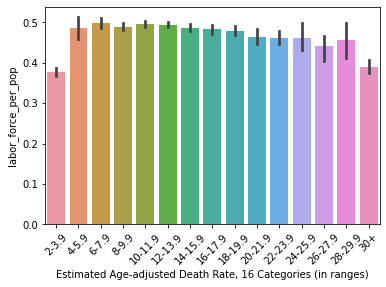

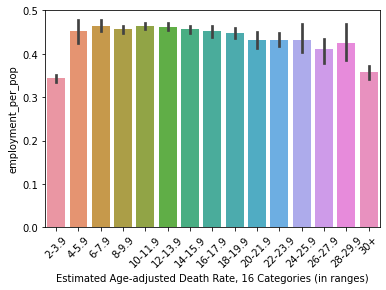

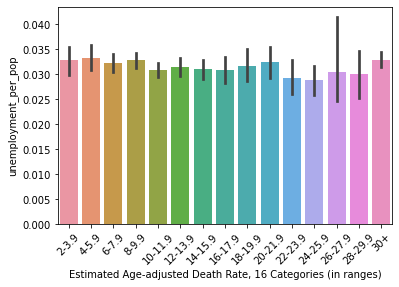

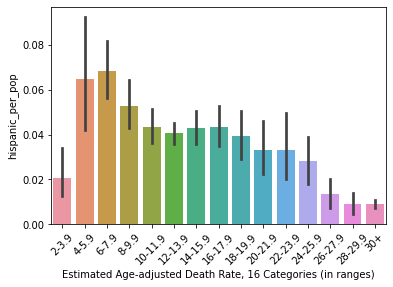

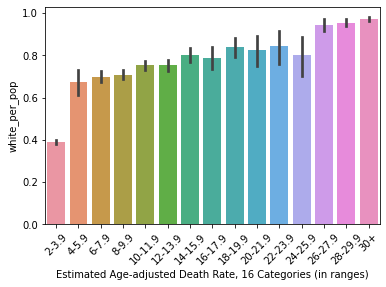

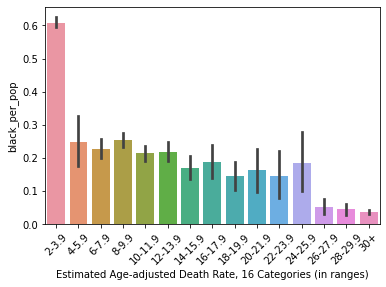

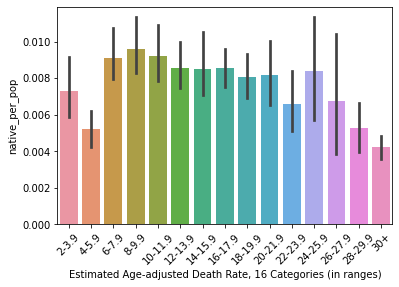

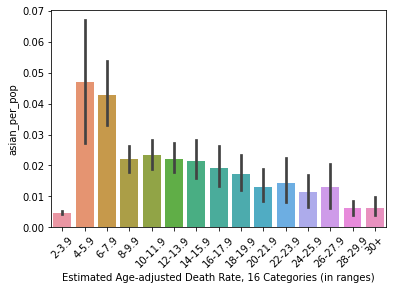

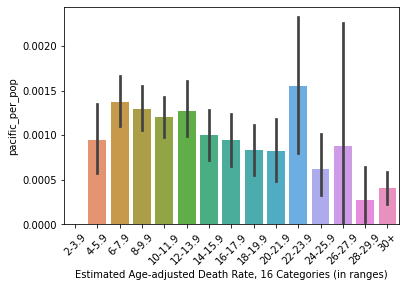

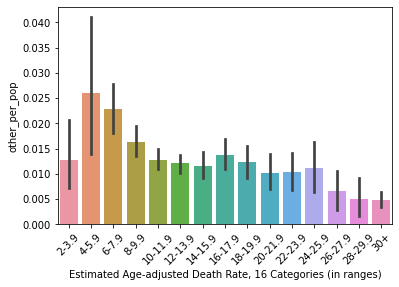

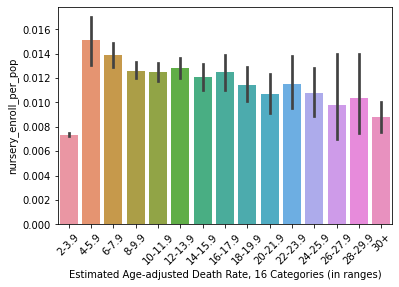

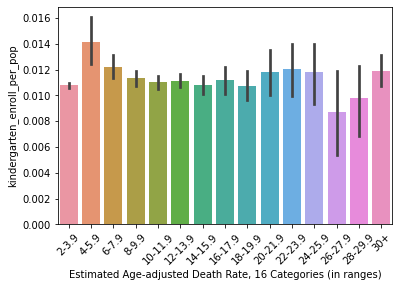

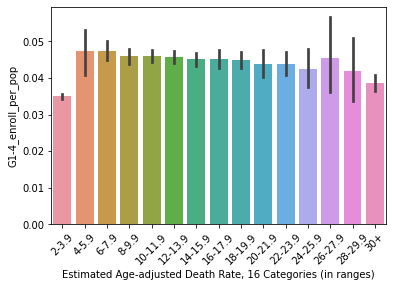

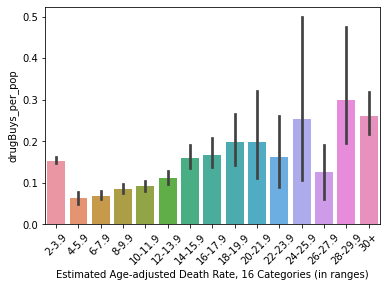

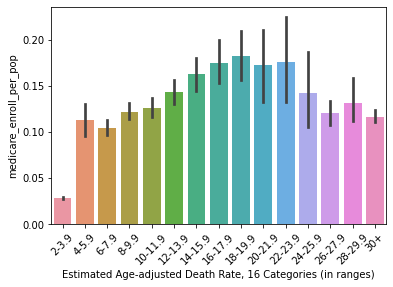

In [15]:
count = 0
for q in engr_features:
  plt.figure(count)
  sns.barplot(data=poisoning, x="Estimated Age-adjusted Death Rate, 16 Categories (in ranges)", y=q, order=death_order)
  plt.xticks(rotation=45)
  count = count+1

In [16]:
#Simplify Classification Problem - reduce number of classes

death_order = ['2-3.9', '4-5.9', '6-7.9','8-9.9','10-11.9', '12-13.9', '14-15.9', '16-17.9', '18-19.9', '20-21.9', '22-23.9', '24-25.9', '26-27.9', '28-29.9', '30+']
death_collapse = ['2-5.9','2-5.9','6-9.9','6-9.9','10-13.9','10-13.9', '14-17.9','14-17.9','18-21.9','18-21.9','22-25.9','22-25.9','26+','26+','26+']
deathReduce = dict(zip(death_order,death_collapse))

#Updated Random Forest Model



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

X = poisoning.drop(['Estimated Age-adjusted Death Rate, 16 Categories (in ranges)','UnemploymentRate',
 'labor_force_per_pop',
 'employment_per_pop',
 'unemployment_per_pop','nursery_enroll_per_pop',
 'kindergarten_enroll_per_pop',
 'G1-4_enroll_per_pop'], axis=1)
X = X.drop('Name', axis=1)
y = poisoning['Estimated Age-adjusted Death Rate, 16 Categories (in ranges)'].copy()

#Transform into refined classes
y_red = []
for p in y:
  y_red.append(deathReduce[p])

num_list = list(X.describe().columns) #get numerical features
cat_list = list(set(X.columns) - set(poisoning.describe().columns)) #get categorical features

X_train, X_test, y_train, y_test = train_test_split(X, y_red, test_size=.2, random_state=42, stratify=y)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()), #put all numerical data on same scale
    ])

num_attribs = num_list  #numerical values to fill in + scale values for
cat_attribs = cat_list #categorical values 

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs) ,
        ("cat", OneHotEncoder(), cat_attribs)],
    )

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support

base_model = RandomForestClassifier(random_state=42)

param_distribs = {
    'max_depth': randint(low=5, high=20),
    'min_samples_split': randint(low=2, high=10),
    'min_samples_leaf': randint(low=1, high=10),
}

rnd_search = RandomizedSearchCV(base_model, param_distributions=param_distribs,
                                n_iter=50, cv=10, scoring='f1_weighted', random_state=42)

rnd_search.fit(X_train, y_train)

cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)


0.5824460012504095 {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 6}
0.5170097285324317 {'max_depth': 19, 'min_samples_leaf': 8, 'min_samples_split': 6}
0.5352229019654755 {'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 3}
0.5091112061574228 {'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 4}
0.5170097285324317 {'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 6}
0.5067869277167667 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.5155739125442361 {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.4838182289084969 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 5}
0.5424565396256864 {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 3}
0.562857731674834 {'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.5424565396256864 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.5114562873719223 {'max_depth': 16, 'min_samples_leaf': 9, 'min_samples_split': 2

In [19]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support


final_model = rnd_search.best_estimator_
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

print("Precision: "+str(metrics[0]))
print("Recall: "+str(metrics[1]))
print("F1: "+str(metrics[2]))

Precision: 0.7392369551126234
Recall: 0.7433155080213903
F1: 0.740262763742052


#SVM Models

In [20]:
#Will be using same train/test splits from the modified Random Forest Model

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Set up each of the SVCs and their parameter grids
svm_lin = SVC(kernel='linear',decision_function_shape='ovr')
#optimize C
paramG_lin = [{'C': [.001,.01,.1,1,10,100,1000]}]

svm_poly = SVC(kernel='poly')
#optimize C, degree, do not include coef0 because not included in self implementation - difficult to compare
paramG_poly = [{'C': [.001,.01,.1,1,10,100,1000], 'degree':[2,3,4,5]}]

svm_rbf = SVC(kernel='rbf')
#optimize C, gamma
paramG_rbf = [{'C': [.001,.01,.1,1,10,100,1000], 'gamma':[0.1,1,5,10]}]

###Linear

In [21]:
#Run grid search - Use F1 as the scoring criteria
grid_svm_lin = GridSearchCV(svm_lin, paramG_lin, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)

grid_svm_lin.fit(X_train, y_train)

print(grid_svm_lin.best_params_)

{'C': 100}


In [22]:
#Print F1 performance for each hyperparameter set
cvres = grid_svm_lin.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.17718255815075534 {'C': 0.001}
0.3052037261981738 {'C': 0.01}
0.43028918023958235 {'C': 0.1}
0.48172745880711776 {'C': 1}
0.5333859042298703 {'C': 10}
0.533967156074285 {'C': 100}
0.5250950732383972 {'C': 1000}


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
#Evaluate best model on testing set
best_lin_svm = grid_svm_lin.best_estimator_
pred_lin_svm = best_lin_svm.predict(X_test)

confMatrix_lin_svm = confusion_matrix(y_test, pred_lin_svm)
prec_lin_svm = precision_score(y_test, pred_lin_svm, average='weighted')
recall_lin_svm = recall_score(y_test,pred_lin_svm, average='weighted')
f1_lin_svm = f1_score(y_test,pred_lin_svm, average='weighted')

print("Confusion Matrix: \n",confMatrix_lin_svm)
print("Precision: ",prec_lin_svm)
print("Recall: ", recall_lin_svm)
print("F1: ", f1_lin_svm)

Confusion Matrix: 
 [[39  4  1  0  1  0 15]
 [17 12  2  0  1  0  1]
 [ 6  7  2  0  0  0  2]
 [ 0  1  0  6  0  0  0]
 [ 2  1  1  0  2  1  0]
 [ 0  0  0  0  1 11  0]
 [14  0  0  1  0  0 36]]
Precision:  0.5631372549019608
Recall:  0.5775401069518716
F1:  0.5605855590157558


###Polynomial

In [24]:
#Run grid search - Use F1 as the scoring criteria

grid_svm_poly = GridSearchCV(svm_poly, paramG_poly, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)

grid_svm_poly.fit(X_train, y_train)

print(grid_svm_poly.best_params_)

{'C': 1000, 'degree': 3}


In [25]:
#Print F1 performance for each hyperparameter set
cvres = grid_svm_poly.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.16396695086726906 {'C': 0.001, 'degree': 2}
0.17962692076389086 {'C': 0.001, 'degree': 3}
0.17981557625455977 {'C': 0.001, 'degree': 4}
0.18971227004198601 {'C': 0.001, 'degree': 5}
0.1822975966164376 {'C': 0.01, 'degree': 2}
0.18507387287042198 {'C': 0.01, 'degree': 3}
0.18822077126715925 {'C': 0.01, 'degree': 4}
0.20387825301696774 {'C': 0.01, 'degree': 5}
0.20295282495266434 {'C': 0.1, 'degree': 2}
0.2057900471509669 {'C': 0.1, 'degree': 3}
0.2499135205846322 {'C': 0.1, 'degree': 4}
0.24306664403048733 {'C': 0.1, 'degree': 5}
0.3310326521632994 {'C': 1, 'degree': 2}
0.2846764213662678 {'C': 1, 'degree': 3}
0.2687389492373876 {'C': 1, 'degree': 4}
0.26758982457433744 {'C': 1, 'degree': 5}
0.510079098921803 {'C': 10, 'degree': 2}
0.4424240676569179 {'C': 10, 'degree': 3}
0.338357311039711 {'C': 10, 'degree': 4}
0.3091085017034677 {'C': 10, 'degree': 5}
0.6031294085060529 {'C': 100, 'degree': 2}
0.6128179884122209 {'C': 100, 'degree': 3}
0.5122070435831285 {'C': 100, 'degree': 4}
0.4

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
#Evaluate best model on testing set
best_poly_svm = grid_svm_poly.best_estimator_
pred_poly_svm = best_poly_svm.predict(X_test)

confMatrix_poly_svm = confusion_matrix(y_test, pred_poly_svm)
prec_poly_svm = precision_score(y_test, pred_poly_svm, average='weighted')
recall_poly_svm = recall_score(y_test,pred_poly_svm, average='weighted')
f1_poly_svm = f1_score(y_test,pred_poly_svm, average='weighted')

print("Confusion Matrix: \n",confMatrix_poly_svm)
print("Precision: ",prec_poly_svm)
print("Recall: ", recall_poly_svm)
print("F1: ", f1_poly_svm)

Confusion Matrix: 
 [[44  5  0  0  1  0 10]
 [ 5 24  3  0  1  0  0]
 [ 2  8  5  0  2  0  0]
 [ 0  0  0  6  0  0  1]
 [ 1  0  2  0  4  0  0]
 [ 0  0  1  0  0 11  0]
 [ 8  0  0  0  0  0 43]]
Precision:  0.7285764130683917
Recall:  0.732620320855615
F1:  0.7280457820099764


###RBF/Gaussian

In [27]:
grid_svm_rbf = GridSearchCV(svm_rbf, paramG_rbf, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)

grid_svm_rbf.fit(X_train, y_train)

print(grid_svm_rbf.best_params_)

{'C': 10, 'gamma': 0.1}


In [28]:
#Print F1 scores for hyperparameter sets
cvres = grid_svm_rbf.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.1527822899775146 {'C': 0.001, 'gamma': 0.1}
0.1527822899775146 {'C': 0.001, 'gamma': 1}
0.1527822899775146 {'C': 0.001, 'gamma': 5}
0.1527822899775146 {'C': 0.001, 'gamma': 10}
0.1527822899775146 {'C': 0.01, 'gamma': 0.1}
0.1527822899775146 {'C': 0.01, 'gamma': 1}
0.1527822899775146 {'C': 0.01, 'gamma': 5}
0.1527822899775146 {'C': 0.01, 'gamma': 10}
0.2772535184905436 {'C': 0.1, 'gamma': 0.1}
0.1527822899775146 {'C': 0.1, 'gamma': 1}
0.1527822899775146 {'C': 0.1, 'gamma': 5}
0.1527822899775146 {'C': 0.1, 'gamma': 10}
0.5375550908198744 {'C': 1, 'gamma': 0.1}
0.5851538781899993 {'C': 1, 'gamma': 1}
0.31091868398779376 {'C': 1, 'gamma': 5}
0.15555809518860267 {'C': 1, 'gamma': 10}
0.6652280039925774 {'C': 10, 'gamma': 0.1}
0.6407296938260683 {'C': 10, 'gamma': 1}
0.3475649623504302 {'C': 10, 'gamma': 5}
0.1841836677774489 {'C': 10, 'gamma': 10}
0.6494449350380526 {'C': 100, 'gamma': 0.1}
0.6407296938260683 {'C': 100, 'gamma': 1}
0.3475649623504302 {'C': 100, 'gamma': 5}
0.1841836677774

In [29]:
#Evaluate best model on hyperparameter set
best_rbf_svm = grid_svm_rbf.best_estimator_
pred_rbf_svm = best_rbf_svm.predict(X_test)

confMatrix_rbf_svm = confusion_matrix(y_test, pred_rbf_svm)
prec_rbf_svm = precision_score(y_test, pred_rbf_svm, average='weighted')
recall_rbf_svm = recall_score(y_test,pred_rbf_svm, average='weighted')
f1_rbf_svm = f1_score(y_test,pred_rbf_svm, average='weighted')

print("Confusion Matrix: \n",confMatrix_rbf_svm)
print("Precision: ",prec_rbf_svm)
print("Recall: ", recall_rbf_svm)
print("F1: ", f1_rbf_svm)

Confusion Matrix: 
 [[46  4  0  0  0  0 10]
 [ 8 18  6  0  0  0  1]
 [ 1  5  9  0  2  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  2  0  3  2  0]
 [ 0  0  0  0  0 12  0]
 [ 7  0  0  2  0  0 42]]
Precision:  0.72653145509112
Recall:  0.732620320855615
F1:  0.7269525797250002


###Summary

In [30]:
pred_lin_svm = best_lin_svm.predict(X_test)
f1_lin_svm = f1_score(y_test,pred_lin_svm, average='weighted')
print("Linear F1: ", f1_lin_svm)

pred_poly_svm = best_poly_svm.predict(X_test)
f1_poly_svm = f1_score(y_test,pred_poly_svm, average='weighted')
print("Polynomial F1: ", f1_poly_svm)

pred_rbf_svm = best_rbf_svm.predict(X_test)
f1_rbf_svm = f1_score(y_test,pred_rbf_svm, average='weighted')
print("RBF/Gaussian F1: ", f1_rbf_svm)

Linear F1:  0.5605855590157558
Polynomial F1:  0.7280457820099764
RBF/Gaussian F1:  0.7269525797250002


#Neural Network

This section of code is included in Neural_Net.ipynb

#Counties of Concern Prediction

This section of code is included in Neural_Net.ipynb